In [ ]:
from data.parse_dataset_50 import parse_dataset

dataset_dir = '/users/bli169/CSCI2470/YOCO/YOCO3k/train/labels/train.txt'
data, labels = parse_dataset(dataset_dir)

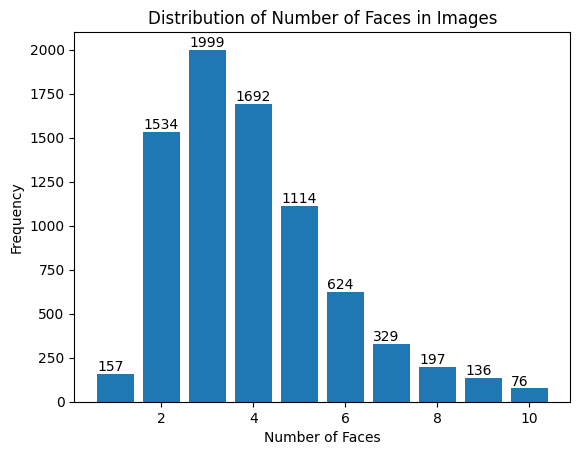

In [ ]:
import matplotlib.pyplot as plt

face_num_dict = {}
for i in range(len(labels)):
    label = labels[i]
    face_num = len(label)
    if face_num <= 10:
        if face_num not in face_num_dict:
            face_num_dict[face_num] = 1
        else:
            face_num_dict[face_num] += 1

bars = plt.bar(face_num_dict.keys(), face_num_dict.values())
plt.xlabel('Number of Faces')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Faces in Images')

# Add text annotations on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, int(yval), va='bottom') 

    plt.savefig('face_distribution.pdf', format='pdf')
plt.show()


In [29]:
from data.parse_dataset_50 import parse_dataset
import random

dataset_dir_w = '/Users/bozhengli/course/CSCI2470/final_proj/datasets/wider_face_split/wider_face_train_bbx_gt.txt'
data_w, labels_w = parse_dataset(dataset_dir_w)

dataset_dir_n = '/Users/bozhengli/course/CSCI2470/final_proj/YOCO/data/facecounting/train.txt'
data_n, labels_n = parse_dataset(dataset_dir_n)

data = data_w + data_n
labels = labels_w + labels_n
balanced_data = []
balanced_labels = []

for face_count in range(11):
    filtered_data = [data[i] for i in range(len(labels)) if len(labels[i]) == face_count]
    filtered_labels = [labels[i] for i in range(len(labels)) if len(labels[i]) == face_count]
    
    sample_size = min(300, len(filtered_data))
    sampled_indices = random.sample(range(len(filtered_data)), sample_size)
    
    balanced_data.extend([filtered_data[i] for i in sampled_indices])
    balanced_labels.extend([filtered_labels[i] for i in sampled_indices])

In [35]:
import os
output_path = '/Users/bozhengli/course/CSCI2470/final_proj/YOCO/data/YOCO3k/train.txt'

combined = list(zip(data, labels))
random.shuffle(combined)
data[:], labels[:] = zip(*combined)

with open(output_path, 'w') as f:
    for i in range(len(data)):
        f.write(data[i] + '\n')
        f.write(str(len(labels[i])) + '\n')
        for label in labels[i]:
            f.write(' '.join(map(str, label)) + '\n')
        
        if 'facecounting' in data[i]:
            origin_path = os.path.join('/Users/bozhengli/course/CSCI2470/final_proj/YOCO/data', data[i])
            new_path = os.path.join('/Users/bozhengli/course/CSCI2470/final_proj/YOCO/data/YOCO3k/train/images', data[i])
        else:
            origin_path = os.path.join('/Users/bozhengli/course/CSCI2470/final_proj/datasets/WIDER_train/images', data[i])
            new_path = os.path.join('/Users/bozhengli/course/CSCI2470/final_proj/YOCO/data/YOCO3k/train/images', data[i])
        os.makedirs(os.path.dirname(new_path), exist_ok=True)
        os.system(f'cp {origin_path} {new_path}')